In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
from prettytable import PrettyTable

In [2]:
# Loading the dataset
iris = pd.read_csv('E:\Python Online Class\iris.csv', header=None, names=["sepal_length","sepal_width","petal_length","petal_width","species"])
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0  sepal_length  sepal_width  petal_length  petal_width  species
1           5.1          3.5           1.4          0.2   setosa
2           4.9            3           1.4          0.2   setosa
3           4.7          3.2           1.3          0.2   setosa
4           4.6          3.1           1.5          0.2   setosa


In [3]:
# Dropping the first row and resetting the index
iris.drop(iris.index[0], inplace=True)
iris.reset_index(drop=True, inplace=True)

# Converting 'species' to numerical format
iris['species'] = iris['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
print(iris.head())

  sepal_length sepal_width petal_length petal_width  species
0          5.1         3.5          1.4         0.2        0
1          4.9           3          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4            5         3.6          1.4         0.2        0


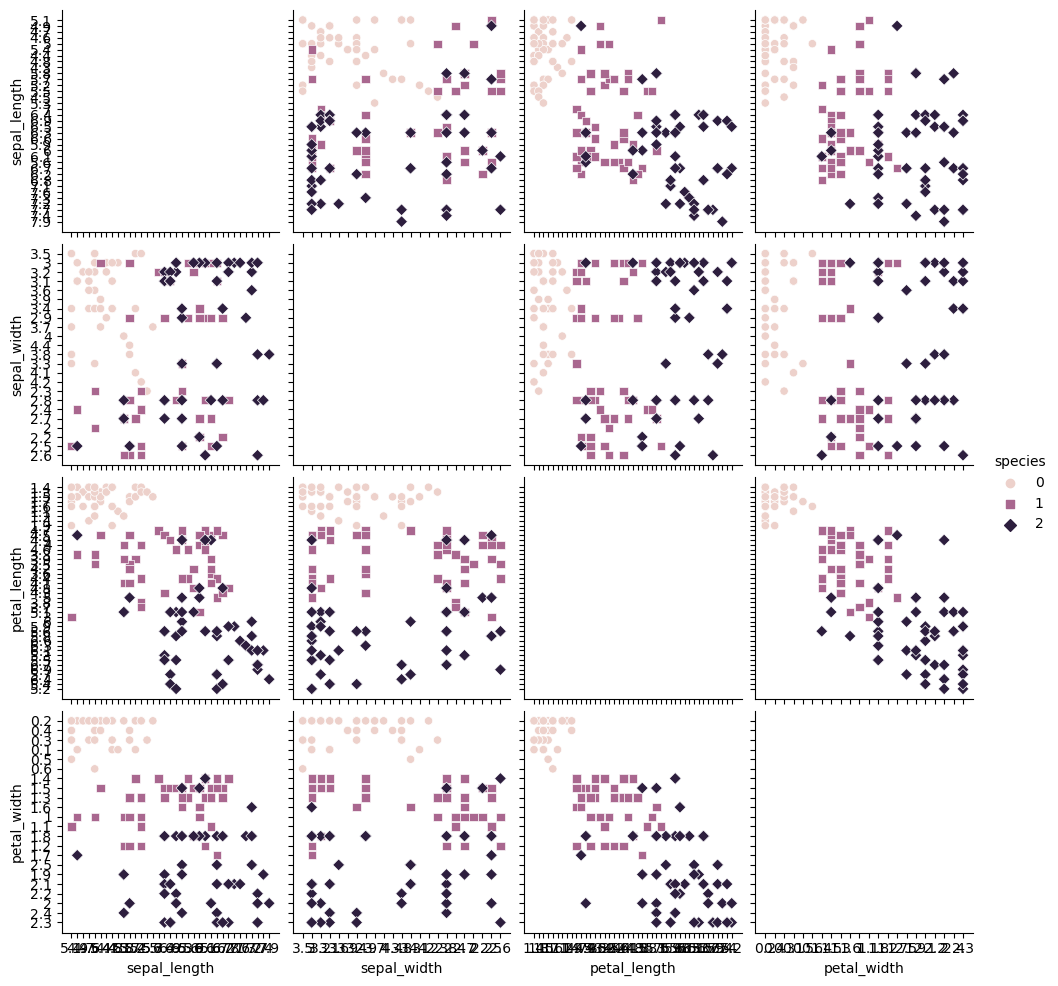

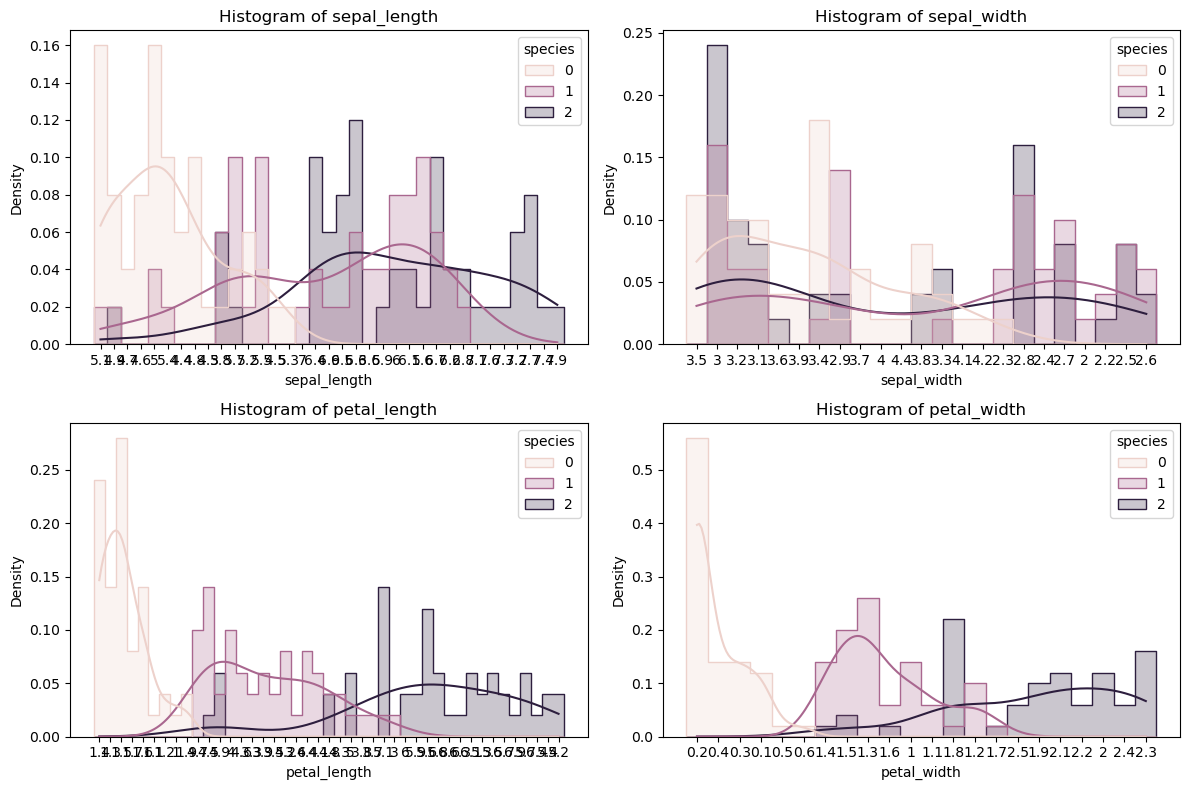

In [4]:
# Visualizing data using seaborn pairplot with scatter plots on the diagonal
sns.pairplot(iris, hue='species', markers=["o", "s", "D"], vars=["sepal_length","sepal_width","petal_length","petal_width"], diag_kind='scatter')
plt.show()


# Visualizing data using seaborn histplot for numeric features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=iris, x=feature, hue='species', element="step", stat="density", common_norm=False, kde=True)
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

Confusion Matrix for KNN:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Confusion Matrix for Naive Bayes:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Confusion Matrix for Decision Tree:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Confusion Matrix for Random Forest:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion Matrix for AdaBoost:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

+---------------+--------------------+---------------+----------+--------+
|     Model     |   Train Accuracy   | Test Accuracy | F1 Score | Recall |
+---------------+--------------------+---------------+----------+--------+
|      KNN      | 0.9666666666666667 |      1.0      |   1.0    |  1.0   |
|  Naive Bayes  |        0.95        |      1.0      |   1.0    |  1.0   |
| Decision Tree |        1.0         |      1.0      |   1.0    |  1.0   |
| Random Forest |        1.0         |      1.0      |   1.0    |  1.0   |
|    AdaBoost   | 0.9666666666666667 |      1.0      |   1.0    |  1.0   |
+---------------+--------------------+---------------+----------+--------+


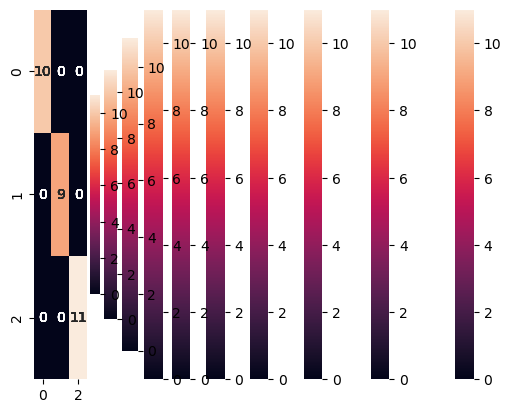

In [6]:
# Setting Targets
x = iris[["sepal_length","sepal_width","petal_length","petal_width"]]
y = iris["species"]

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Models
models = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier()
}

# Results
results = {'Model': [], 'Train Accuracy': [], 'Test Accuracy': [], 'F1 Score': [], 'Recall': []}

# Iterate through models
for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Predictions on training and testing sets
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Calculating metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')

    # Saving results
    results['Model'].append(model_name)
    results['Train Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)
    results['F1 Score'].append(f1)
    results['Recall'].append(recall)

    # Displaying confusion matrix
        print(f"Confusion Matrix for {model_name}:\n{confusion_matrix(y_test, y_pred_test)}\n")

# Creating PrettyTable
table = PrettyTable(['Model', 'Train Accuracy', 'Test Accuracy', 'F1 Score', 'Recall'])
for i in range(len(results['Model'])):
    table.add_row([
        results['Model'][i],
        results['Train Accuracy'][i],
        results['Test Accuracy'][i],
        results['F1 Score'][i],
        results['Recall'][i]
    ])

# Printing PrettyTable
print(table)